In [9]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [7]:
# Method 1: Using curly braces
dict1 = {}


print(dict1)  # Output: {}


{}
{'model': 'GNB', 'Test Accuracy': 0.95}


,model,Test Accuracy
0,GNB,0.95


In [8]:
def generate_ecfp6_fingerprint(smiles):
    """
    Generate ECFP6 fingerprint as a bit vector for a molecule in SMILES format.

    Parameters:
    - smiles (str): SMILES representation of the molecule

    Returns:
    - fingerprint (list): List representing the bit vector of the ECFP6 fingerprint
    """
    mol = Chem.MolFromSmiles(smiles)

    if mol is not None:
        # Generate ECFP6 fingerprint
        ecfp6 = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)

        # Convert the bit vector to a list of integers
        fingerprint = [int(ecfp6.GetBit(i)) for i in range(ecfp6.GetNumBits())]

        return fingerprint
    else:
        return None


In [10]:
df_actives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-actives.smi', sep='\t', header=None)
df_actives.columns = ['SMILES', 'ID']
df_actives['category'] = 1
df_inactives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-inactives.smi', sep='\t', header=None)
df_inactives.columns = ['SMILES', 'ID']
df_inactives['category'] = 0
df = pd.concat([df_actives, df_inactives], axis=0)
df.head()

,SMILES,ID,category
0,[O-][S+](CCO)CCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(...,CHEMBL1923015,1
1,[O-][S+]1CCN(Cc2ccc(-c3cc4c(Nc5ccc(OCc6cccc(F)...,CHEMBL3409483,1
2,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL377250,1
3,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212954,1
4,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212965,1


In [11]:
dictionary_data = dict(zip(df['ID'], df['SMILES']))


# Generate fingerprints for each SMILES in the list
fingerprints_data = [(smiles_id, generate_ecfp6_fingerprint(smiles)) for smiles_id, smiles in list(dictionary_data.items())]

# Create a DataFrame with column names
column_names = [f'ecfp_{i+1}' for i in range(2048)]  # Adjust the number based on your fingerprint size
df_FP = pd.DataFrame([{"ID": smiles_id, **dict(zip(column_names, fingerprint))} for smiles_id, fingerprint in fingerprints_data])

df_all = pd.merge(df, df_FP, on='ID')
print(df_all.head())

                                              SMILES             ID  category  \
0  [O-][S+](CCO)CCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(...  CHEMBL1923015         1   
1  [O-][S+]1CCN(Cc2ccc(-c3cc4c(Nc5ccc(OCc6cccc(F)...  CHEMBL3409483         1   
2  [O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...   CHEMBL377250         1   
3  [O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...   CHEMBL212954         1   
4  [O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...   CHEMBL212965         1   

   ecfp_1  ecfp_2  ecfp_3  ecfp_4  ecfp_5  ecfp_6  ecfp_7  ...  ecfp_2039  \
0       0       0       0       0       0       0       0  ...          0   
1       0       0       0       0       0       0       0  ...          0   
2       0       0       0       0       0       0       0  ...          0   
3       0       0       0       0       0       0       0  ...          0   
4       0       0       0       0       0       0       0  ...          0   

   ecfp_2040  ecfp_2041  ecfp_2042  ecfp_2043  ecf

In [12]:
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all.head()

,SMILES,ID,category,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
0,O=C(O)CNCP(=O)(O)O,CHEMBL95764,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,O=C(c1cc(-c2ccc3[nH]ncc3c2)on1)N1CCCC(O)C1,CHEMBL1997340,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cc1cc(Nc2ncnc3cnc(N4CCOCC4)cc23)ccc1OC1CCN(C(=...,CHEMBL231102,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,CHEMBL1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NCC1CCN(Cc2ccn3ncnc(Nc4ccc5c(cnn5Cc5cccc(F)c5)...,CHEMBL391778,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
X = df_all.drop(['ID', 'SMILES', 'category'], axis=1).values
y = df_all['category'].values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer, auc, roc_curve

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:

# Define column names
columns = ['model', 'Test Accuracy']

# Create an empty DataFrame with column names
Model_perf = pd.DataFrame(columns=columns)

print(Model_perf)


Empty DataFrame
Columns: [model, Test Accuracy]
Index: []


##Gaussian Naive Bayes Model

In [25]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#params_grid
params_GNB = {}

clf = GaussianNB()

#grid search
gridsearch = GridSearchCV(clf, params_GNB, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)

best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'GNB', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)


Best parameters:  {}
Test accuracy : 81.74%
{'model': 'GNB', 'Test Accuracy': '81.74%'}
  model Test Accuracy
0   GNB        81.74%
  model Test Accuracy
0   GNB        81.74%


<ipython-input-25-fd252bc3bfbd>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


## Bernoulli Naive Bayes Model

In [26]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#params_grid
params_BNB = {
	'alpha':[0.1,1,10]
	}

clf = BernoulliNB()

#grid search
gridsearch = GridSearchCV(clf, params_BNB, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)

best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'BNB', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)


Best parameters:  {'alpha': 0.1}
Test accuracy : 83.16%
  model Test Accuracy
0   GNB        81.74%
1   BNB        83.16%


<ipython-input-26-b43e5f781195>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


## Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

#params_grid
params_LR = {
	'C':[0.01, 0.1, 1, 10],
	'penalty':['l1', 'l2'],
	'solver':['liblinear', 'saga']
	}

clf = LogisticRegression()

#grid search
gridsearch = GridSearchCV(clf, params_LR, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)

best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'LR', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Test accuracy : 87.32%
  model Test Accuracy
0   GNB        81.74%
1   BNB        83.16%
2    LR        87.32%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-27-63adf99d3371>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


## Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

#params_grid
params_DT = {
	'criterion':['gini','entropy'],
	'max_depth':[5,8,10,15,20],
	'min_samples_split':[2,3,4,5,7,10,15],
	'min_samples_leaf':[2,3,4,5,7,10,15]
	}

clf = DecisionTreeClassifier()

#grid search
gridsearch = GridSearchCV(clf, params_DT, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)

best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'Decision Tree', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)


Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}
Test accuracy : 85.50%
           model Test Accuracy
0            GNB        81.74%
1            BNB        83.16%
2             LR        87.32%
3  Decision Tree        85.50%


<ipython-input-28-501bf7909c76>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

#params_grid
params_RF = {
	'n_estimators':[10,20,50,100],
	'criterion':['gini','entropy'],
	'max_depth':[5,8,10,15,20],
	'min_samples_split':[2,3,4,5,7,10,15],
	'min_samples_leaf':[2,3,4,5,7,10,15]
	}

clf = RandomForestClassifier()

#grid search
gridsearch = GridSearchCV(clf, params_RF, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)

best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'Random Forest', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)

Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test accuracy : 88.44%
           model Test Accuracy
0            GNB        81.74%
1            BNB        83.16%
2             LR        87.32%
3  Decision Tree        85.50%
4  Random Forest        88.44%


<ipython-input-29-72a636ddc7c3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


## Support Vector Machine Model

In [30]:
from sklearn.svm import SVC

#params_grid
params_svm = {
	'C': [0.1, 1, 10],
	'kernel': ['linear','poly','rbf'],
	'gamma':['auto','scale']
	}

clf = SVC()

#grid search
gridsearch = GridSearchCV(clf, params_svm, cv = 5, scoring = 'accuracy', verbose=0)

gridsearch.fit(X_train, y_train)


best_params = gridsearch.best_params_
best_model = gridsearch.best_estimator_
print("Best parameters: ", best_params)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy : {:.2f}%".format(accuracy*100))

# Create a new row as a dictionary
new_row = {'model': 'SVM', 'Test Accuracy': '{:.2f}%'.format(accuracy*100)}

# Append the new row to the existing DataFrame
Model_perf = Model_perf.append(new_row, ignore_index=True)

print(Model_perf)

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test accuracy : 89.96%
           model Test Accuracy
0            GNB        81.74%
1            BNB        83.16%
2             LR        87.32%
3  Decision Tree        85.50%
4  Random Forest        88.44%
5            SVM        89.96%


<ipython-input-30-7de4e6c3bf33>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row, ignore_index=True)


In [31]:
Model_perf

,model,Test Accuracy
0,GNB,81.74%
1,BNB,83.16%
2,LR,87.32%
3,Decision Tree,85.50%
4,Random Forest,88.44%
5,SVM,89.96%


from matplotlib import pyplot as plt
import seaborn as sns
Model_perf.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Model_perf.groupby('Test Accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test Accuracy'].value_counts()
    for x_label, grp in Model_perf.groupby('model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('model')
_ = plt.ylabel('Test Accuracy')

In [39]:
Model_perf.to_csv('Model_perf.csv')

In [37]:
Model_perf['Test Accuracy'] = Model_perf['Test Accuracy'].apply(lambda x: x.strip('%'))
Model_perf['Test Accuracy'] = Model_perf['Test Accuracy'].astype(float)

<Axes: xlabel='model'>

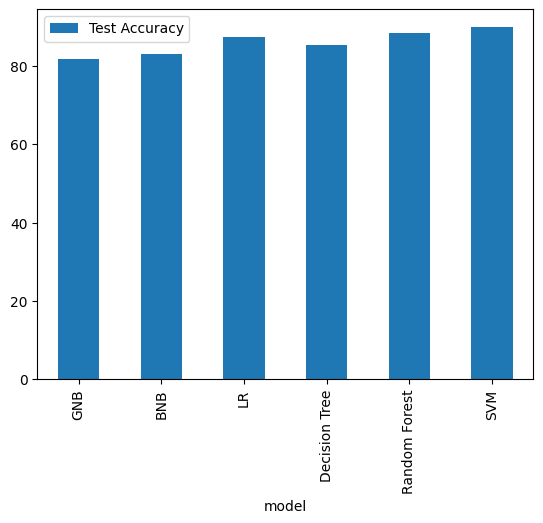

In [38]:
Model_perf.plot(x='model', y='Test Accuracy', kind='bar')